In [12]:
import pandas as pd
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import re

**Задание 1. Загрузите файл HR.csv в pandas dataframe**

In [27]:
df = pd.read_csv('C:\\Users\\folag\\Downloads\\HR.csv')

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Задание 2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).**

In [3]:
for column in df:
    if column not in ['department', 'salary']:
        print('Название:', column)
        print('Среднее:', df[column].mean())
        print('Медиана:', df[column].median())
        print('Мода:', df[column].mode()[0])
        print('Минимальное:', df[column].min())
        print('Максимальное:', df[column].max())
        print('Средн. отклонение:', df[column].std())
        print('')
    if column in ['department', 'salary']:
        print('Название:', column)
        print('Мода:', df[column].mode()[0])
        print('')

Название: satisfaction_level
Среднее: 0.6128335222348166
Медиана: 0.64
Мода: 0.1
Минимальное: 0.09
Максимальное: 1.0
Средн. отклонение: 0.2486306510611418

Название: last_evaluation
Среднее: 0.7161017401159978
Медиана: 0.72
Мода: 0.55
Минимальное: 0.36
Максимальное: 1.0
Средн. отклонение: 0.17116911062327592

Название: number_project
Среднее: 3.80305353690246
Медиана: 4.0
Мода: 4
Минимальное: 2
Максимальное: 7
Средн. отклонение: 1.2325923553183857

Название: average_montly_hours
Среднее: 201.0503366891126
Медиана: 200.0
Мода: 135
Минимальное: 96
Максимальное: 310
Средн. отклонение: 49.943099371284305

Название: time_spend_company
Среднее: 3.498233215547703
Медиана: 3.0
Мода: 3
Минимальное: 2
Максимальное: 10
Средн. отклонение: 1.4601362305354546

Название: Work_accident
Среднее: 0.1446096406427095
Медиана: 0.0
Мода: 0
Минимальное: 0
Максимальное: 1
Средн. отклонение: 0.3517185523801279

Название: left
Среднее: 0.2380825388359224
Медиана: 0.0
Мода: 0
Минимальное: 0
Максимальное: 1
Средн

**Задание 3. Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.**

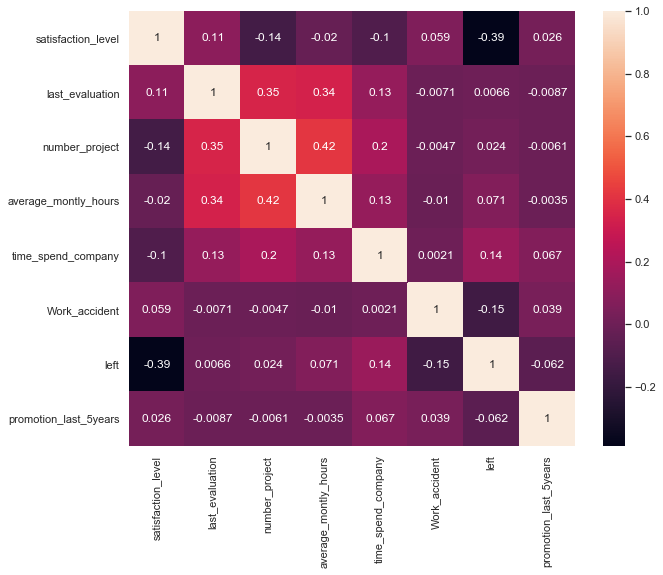

In [4]:
df.corr()

sns.set(rc = {'figure.figsize':(10, 8)})
sns.heatmap(df.corr(), annot = True)
plt.show()

#Чем ближе коэффицент к |1|, тем больше корреляция. В таблице ближе всего к |1| - average_montly_hours и number_project (0.42)
#Чем ближе коэффицент к нулю, тем меньше корреляция. В таблице ближе всего к 0 - корреляция Work_accident и time_spend_company (0,0021)

**Задание 4. Рассчитайте сколько сотрудников работает в каждом
департаменте.**

In [5]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

**Задание 5. Показать распределение сотрудников по зарплатам.**

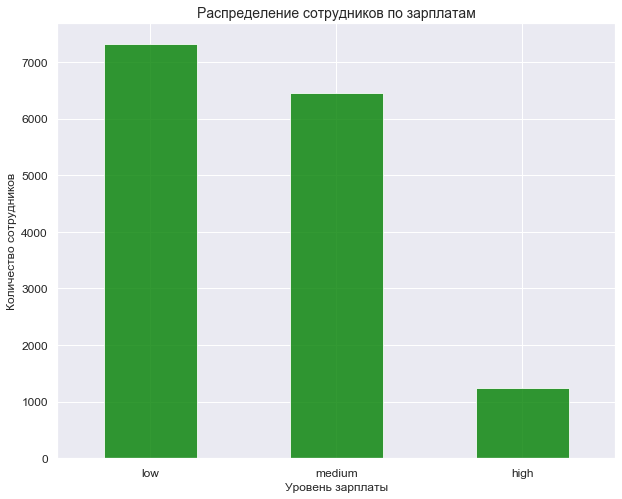

In [6]:
salaries = df['salary'].value_counts()
salaries.plot(kind = 'bar', fontsize = 12, color = 'green', alpha = 0.8)
plt.title('Распределение сотрудников по зарплатам', fontsize = 14)
plt.ylabel('Количество сотрудников')
plt.xticks(rotation=0)
plt.xlabel('Уровень зарплаты')
plt.show()

**Задание 6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности.**

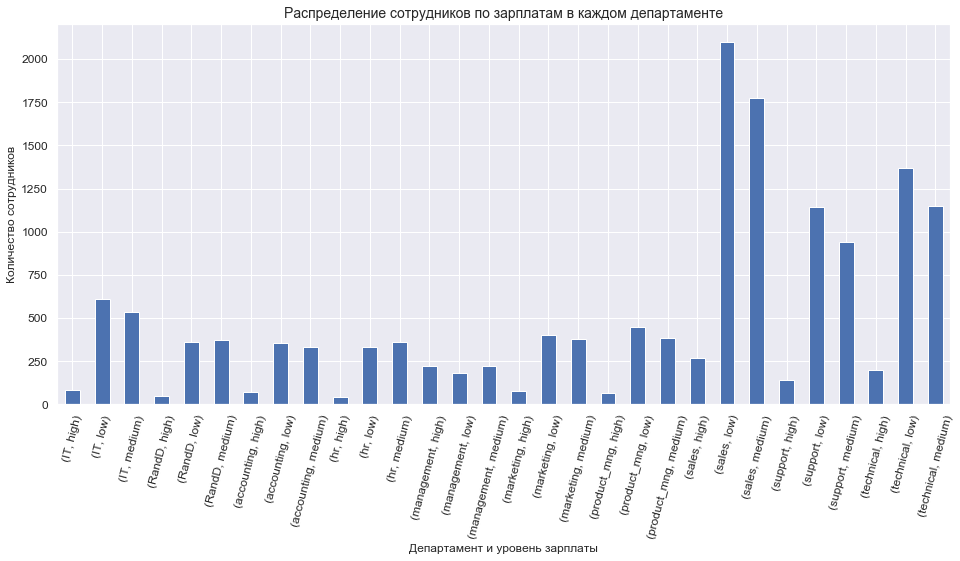

In [7]:
salaries_dep = df[['department', 'salary']].groupby(['department', 'salary']).agg({'salary':['count']})


salaries_dep.plot(kind = 'bar', fontsize = 12,  legend=False, figsize=(16, 7))
plt.title('Распределение сотрудников по зарплатам в каждом департаменте', fontsize = 14)
plt.xlabel('Департамент и уровень зарплаты')
plt.xticks(rotation=75)
plt.ylabel('Количество сотрудников')
plt.show()

**Задание 7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом.**

In [8]:
pd.options.mode.chained_assignment = None

sal_check = df[['average_montly_hours', 'salary']]

def salary_to_num(row):
    if row['salary'] == 'low':
        return 1
    elif row['salary'] == 'medium':
        return 2
    elif row['salary'] == 'high':
        return 3

sal_check['salary'] = sal_check.apply(salary_to_num, axis = 1)


print('Коэффицент Пирсона:', sal_check.corr())
print('')
print('Коэффицент Спирмана:', sal_check.corr(method = 'spearman'))
print('')
print('Коэффицент Кенделла:', sal_check.corr(method = 'kendall'))

#При любом варианте расчета значение коэффицента близко к 0.
#Можно предположить, что значения (оклада и времени на работе) мало связаны или связь нелинейная.

Коэффицент Пирсона:                       average_montly_hours    salary
average_montly_hours              1.000000 -0.002242
salary                           -0.002242  1.000000

Коэффицент Спирмана:                       average_montly_hours    salary
average_montly_hours              1.000000  0.002452
salary                            0.002452  1.000000

Коэффицент Кенделла:                       average_montly_hours    salary
average_montly_hours              1.000000  0.001896
salary                            0.001896  1.000000


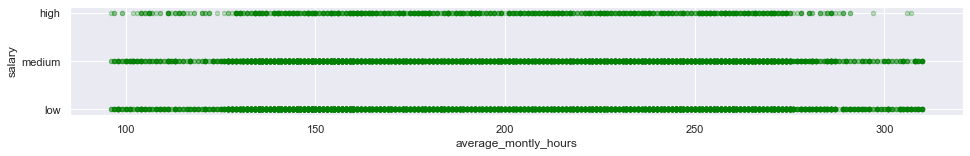

In [9]:
#Проверка визуализацией - на графице в целом нет видимой корреляции оклада и времени на работе.

df.plot(kind= 'scatter', x ='average_montly_hours', y = 'salary', c = 'green', figsize=(16, 2), alpha = 0.25)
plt.show()

**Задание 8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):**

● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности 
● Среднее количество проектов

In [22]:
left = df[df['left'] == 1]
stayed = df[df['left'] == 0]

promoted_and_left = left['promotion_last_5years'][left['promotion_last_5years'] == 1].count()
promoted_of_left = promoted_and_left/(left['promotion_last_5years'].count())

print('Среди уволившихся:')
print('Доля сотрудников с повышением за последние 5 лет:', round(promoted_of_left, 5))
print('Средняя степень удовлетворенности:', round(left['satisfaction_level'].mean()*100, 2), '%')
print('Среднее число проектов:', round(left['number_project'].mean(), 5))

print('')

promoted_and_stayed = stayed['promotion_last_5years'][stayed['promotion_last_5years'] == 1].count()
promoted_of_stayed = promoted_and_stayed/(stayed['promotion_last_5years'].count())

print('Среди не уволившихся:')
print('Доля сотрудников с повышением за последние 5 лет:', round(promoted_of_stayed, 5))
print('Средняя степень удовлетворенности:', round(stayed['satisfaction_level'].mean()*100, 2), '%')
print('Среднее число проектов:', round(stayed['number_project'].mean(), 5))

Среди уволившихся:
Доля сотрудников с повышением за последние 5 лет: 0.00532
Средняя степень удовлетворенности: 44.01 %
Среднее число проектов: 3.8555

Среди не уволившихся:
Доля сотрудников с повышением за последние 5 лет: 0.02625
Средняя степень удовлетворенности: 66.68 %
Среднее число проектов: 3.78666


**Задание 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary). Оценить качество модели на тестовой выборке**

In [28]:
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9)

lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

lda.predict(X_test)

check = pd.DataFrame([y_test, lda.predict(X_test)]).T

quality = accuracy_score(y_test, lda.predict(X_test))
lda.coef_

print('Точность модели:', round(quality*100, 2), '%')

Точность модели: 76.32 %
